In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

from collections import OrderedDict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils_evaluation import *

In [3]:
sns.set(style='ticks')
sns.set_palette('cubehelix')

# KiDS vs STAR & KiDS vs NON-STAR
## SDSS cleaned, mags+colors, R cut, all tiles, CLASS_STAR +

In [4]:
preds_kids = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-10_15:59:18.csv')
preds_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-13_11:53:13.csv')
preds_non_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-13_11:55:05.csv')

In [5]:
print(preds_kids.shape)
print(preds_star.shape)
print(preds_non_star.shape)

(26869, 6)
(12865, 6)
(14004, 6)


In [6]:
preds_kids_x_star = preds_kids.loc[preds_kids['ID'].isin(preds_star['ID'])]
preds_kids_x_non_star = preds_kids.loc[preds_kids['ID'].isin(preds_non_star['ID'])]

In [7]:
print(preds_kids_x_star.shape)
print(preds_kids_x_non_star.shape)

(10228, 6)
(11258, 6)


In [8]:
print(np.unique(preds_kids['CLASS'], return_counts=True))
print(np.unique(preds_star['CLASS'], return_counts=True))
print(np.unique(preds_non_star['CLASS'], return_counts=True))
print(np.unique(preds_kids_x_star['CLASS'], return_counts=True))
print(np.unique(preds_kids_x_non_star['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([13756,  4849,  8264]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 106, 4499, 8260]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([13570,   369,    65]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  82, 3580, 6566]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([10904,   299,    55]))


Multiclass classification results:
Accuracy = 0.9357
F1 per class = [0.0708 0.9144 0.953 ]


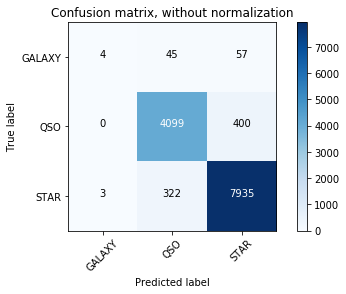

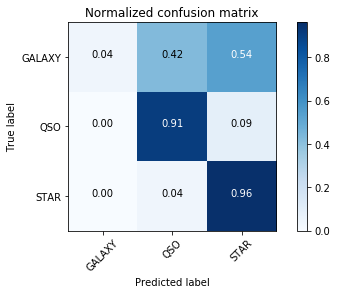

Binary classification results:
Predicted positives: 4466/12865 (34.71%)
logloss = 0.1672
ROC AUC = 0.9829


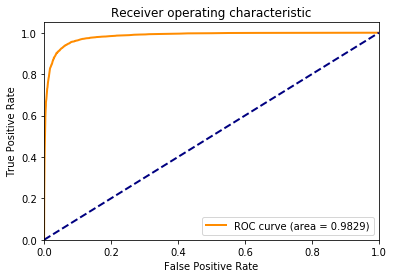

f1 = 0.9144
accuracy = 0.9404
recall = 0.9111
precision = 0.9178


In [9]:
classification_report(preds_star)

Multiclass classification results:
Accuracy = 0.9361
F1 per class = [0.1474 0.9135 0.9539]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


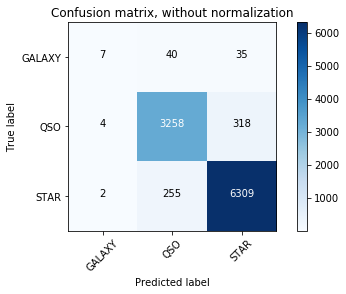

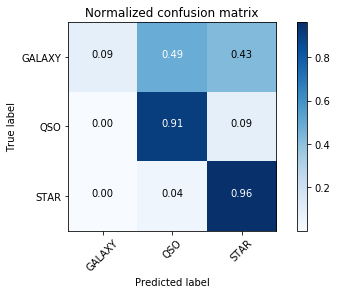

Binary classification results:
Predicted positives: 3553/10228 (34.74%)
logloss = 0.1694
ROC AUC = 0.9826


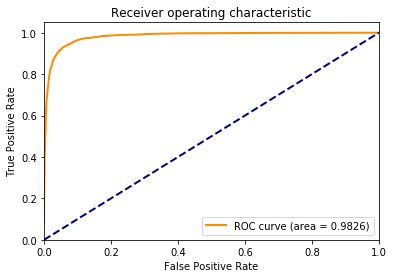

f1 = 0.9135
accuracy = 0.9397
recall = 0.9101
precision = 0.9170


In [10]:
classification_report(preds_kids_x_star)

Multiclass classification results:
Accuracy = 0.9791
F1 per class = [0.9898 0.5769 0.3297]


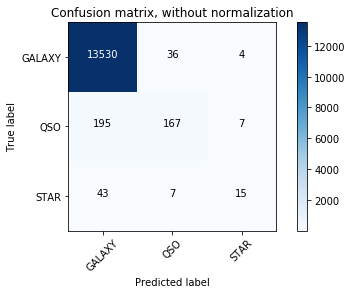

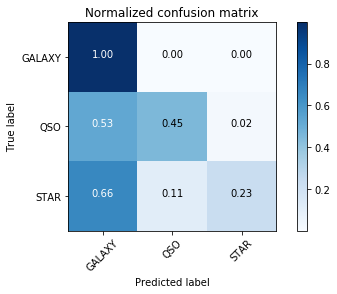

Binary classification results:
Predicted positives: 210/14004 (1.50%)
logloss = 0.0910
ROC AUC = 0.9297


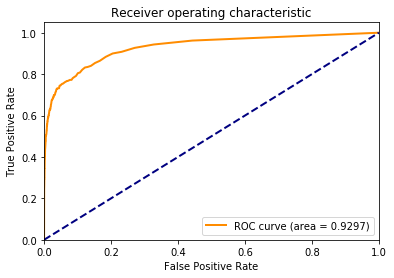

f1 = 0.5769
accuracy = 0.9825
recall = 0.4526
precision = 0.7952


In [11]:
classification_report(preds_non_star)

Multiclass classification results:
Accuracy = 0.9791
F1 per class = [0.9897 0.569  0.4416]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


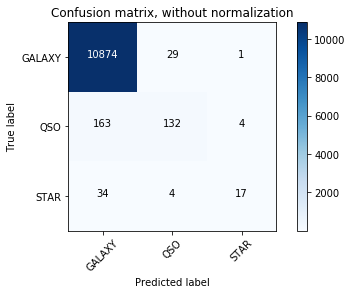

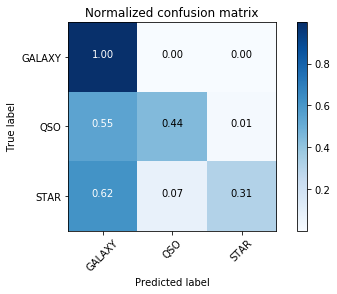

Binary classification results:
Predicted positives: 165/11258 (1.47%)
logloss = 0.0922
ROC AUC = 0.9319


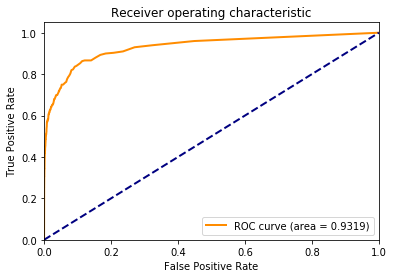

f1 = 0.5690
accuracy = 0.9822
recall = 0.4415
precision = 0.8000


In [12]:
classification_report(preds_kids_x_non_star)

# KiDS vs KiDS STAR, SDSS cleaned, mags + colors, R cut, all tiles

In [18]:
preds_1 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-06_11:39:58.csv')
preds_2 = pd.read_csv('experiments/KiDS_DR3_STAR_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-10_10:21:20.csv')

In [19]:
print(preds_1.shape)
print(preds_2.shape)

(26869, 6)
(12676, 6)


In [20]:
id_intersection = np.intersect1d(preds_1['ID'], preds_2['ID'])
set_intersection = preds_1.loc[preds_1['ID'].isin(id_intersection)]
id_intersection.shape

(10097,)

In [21]:
print(np.unique(preds_1['CLASS'], return_counts=True))
print(np.unique(preds_2['CLASS'], return_counts=True))
print(np.unique(set_intersection['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([13756,  4849,  8264]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  84, 4442, 8150]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  68, 3555, 6474]))


Multiclass classification results:
Accuracy = 0.9212
F1 per class = [0.1314 0.909  0.9446]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


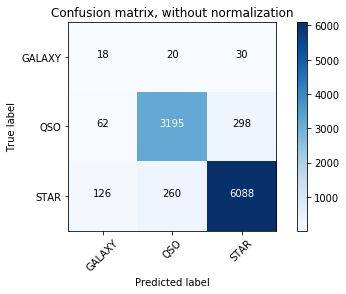

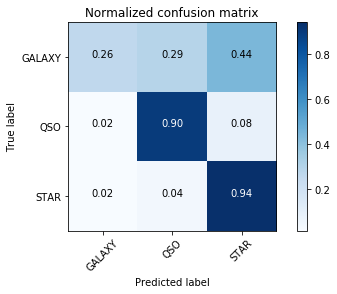

Binary classification results:
Predicted positives: 3475/10097 (34.42%)
logloss = 0.1745
ROC AUC = 0.9809


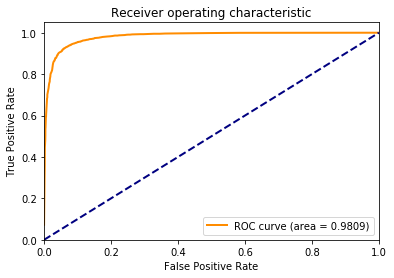

precision = 0.9194
accuracy = 0.9366
recall = 0.8987
f1 = 0.9090


In [22]:
classification_report(preds_1.loc[preds_1['ID'].isin(id_intersection)])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9345
F1 per class = [0.0286 0.9123 0.9515]


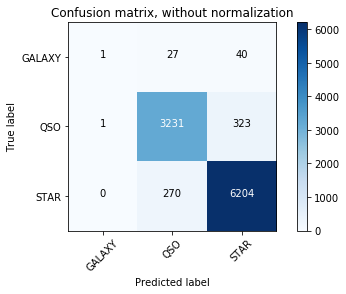

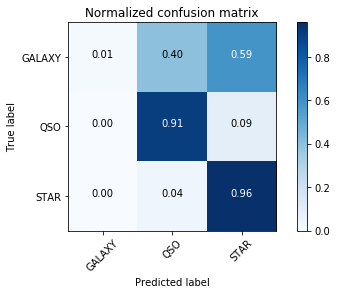

Binary classification results:
Predicted positives: 3528/10097 (34.94%)
logloss = 0.1670
ROC AUC = 0.9821


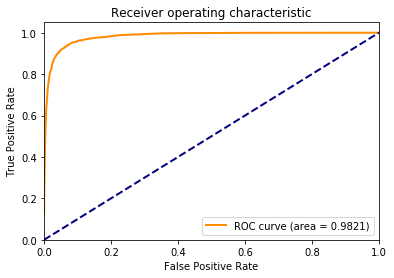

precision = 0.9158
accuracy = 0.9385
recall = 0.9089
f1 = 0.9123


In [23]:
classification_report(preds_2.loc[preds_2['ID'].isin(id_intersection)])

# KiDS (mags + colors) vs. colors

In [13]:
preds_1 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_rcut__2018-03-05_14:13:44.csv')
preds_2 = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_colors_cut__2018-03-05_13:59:06.csv')

In [14]:
id_intersection = np.intersect1d(preds_1['ID'], preds_2['ID'])
set_intersection = preds_1.loc[preds_1['ID'].isin(id_intersection)]
id_intersection.shape

(23188,)

In [15]:
print(np.unique(preds_1['CLASS'], return_counts=True))
print(np.unique(preds_2['CLASS'], return_counts=True))
print(np.unique(set_intersection['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12089,  4352,  7329]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12090,  4098,  7231]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([12071,  3911,  7206]))


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9417
F1 per class = [0.9696 0.8699 0.9335]


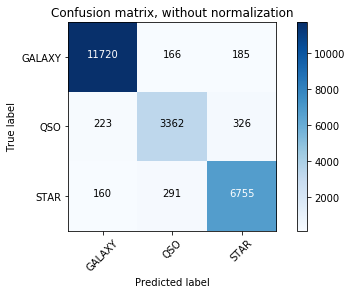

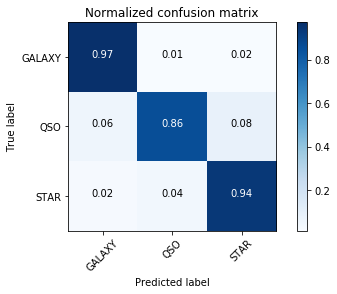

Binary classification results:
Predicted positives: 3819/23188 (16.47%)
logloss = 0.1573
ROC AUC = 0.9782


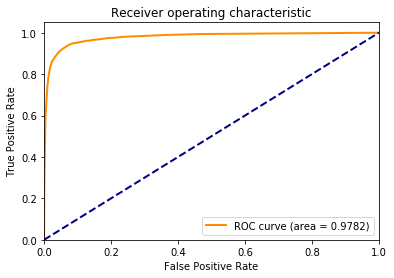

recall = 0.8596
accuracy = 0.9566
precision = 0.8803
f1 = 0.8699


In [16]:
classification_report(preds_1.loc[preds_1['ID'].isin(id_intersection)])

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9311
F1 per class = [0.9636 0.8473 0.9217]


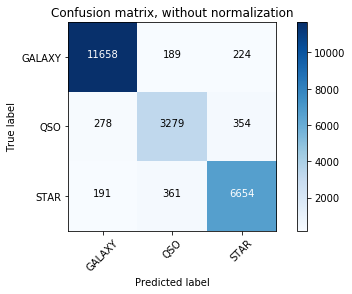

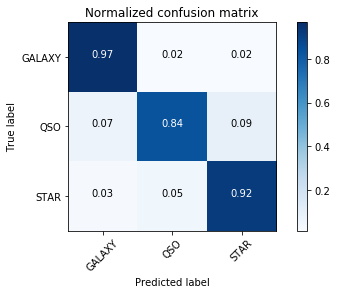

Binary classification results:
Predicted positives: 3829/23188 (16.51%)
logloss = 0.2087
ROC AUC = 0.9679


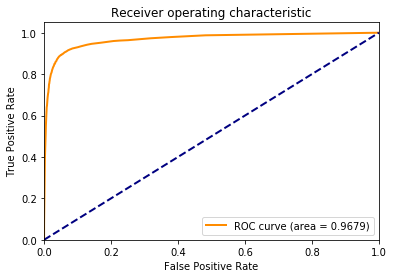

recall = 0.8384
accuracy = 0.9490
precision = 0.8564
f1 = 0.8473


In [17]:
classification_report(preds_2.loc[preds_2['ID'].isin(id_intersection)])

# Astronet
SDSS cleaned, mags+colors+class_star, R cut, all tiles

In [69]:
preds_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_astronet_f-all_cut-r__2018-08-03_17:07:55.csv')
# predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_astronet_f-all_cut-r__2018-08-03_16:41:18.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'

Multiclass classification results:
Accuracy = 0.9353
F1 per class = [0.2368 0.9143 0.9532]
Logloss = 0.2187


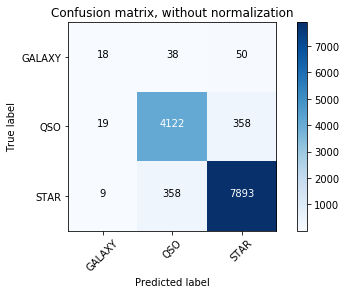

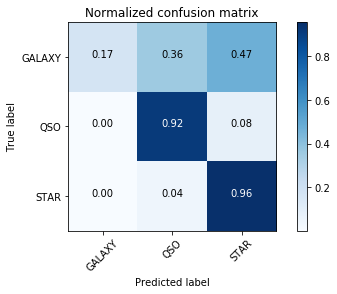

Binary classification results:
Predicted positives: 4518/12865 (35.12%)
logloss = 0.1812
ROC AUC = 0.9799


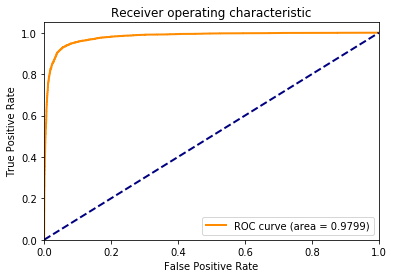

accuracy = 0.9399
f1 = 0.9143
precision = 0.9124
recall = 0.9162


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/snakoneczny/tools/python3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


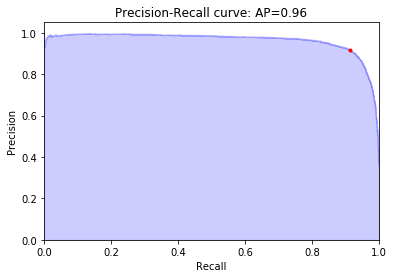

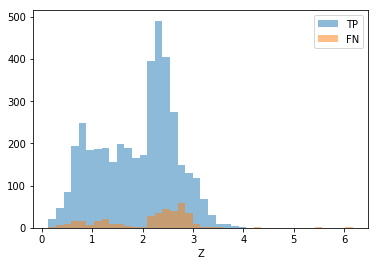

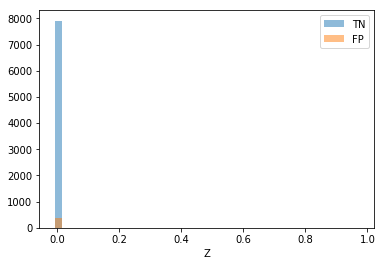

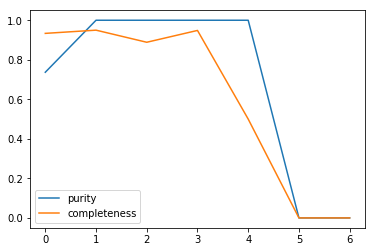

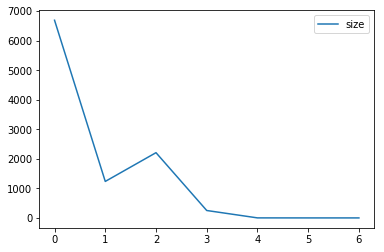

In [71]:
classification_report(preds_star)

In [ ]:
redshift_report(preds_star, data_path)

In [42]:
redshift_report(preds_star)

0.3013878945129163
binned
(-0.00795, 0.492]    8447
(0.492, 0.992]        706
(0.992, 1.492]        624
(1.492, 1.992]        616
(1.992, 2.492]       1394
(2.492, 2.992]        815
(2.992, 3.492]        238
(3.492, 3.992]         20
(3.992, 4.492]          2
(4.492, 4.992]          0
(4.992, 5.492]          0
(5.492, 5.992]          1
(5.992, 6.492]          1
dtype: int64
binned
(-0.00795, 0.492]    0.180922
(0.492, 0.992]       0.657218
(0.992, 1.492]       0.279898
(1.492, 1.992]       0.277766
(1.992, 2.492]       0.515351
(2.492, 2.992]       0.854958
(2.992, 3.492]       0.386559
(3.492, 3.992]       0.825786
(3.992, 4.492]       2.058323
(4.492, 4.992]            NaN
(4.992, 5.492]            NaN
(5.492, 5.992]       5.181839
(5.992, 6.492]       6.311743
Name: residual, dtype: float64


In [74]:
redshift_report(preds_star.loc[preds_star['class_pred'] == 'QSO'])

0.532804223442429
binned
(-0.00402, 0.496]     478
(0.496, 0.996]        654
(0.996, 1.496]        580
(1.496, 1.996]        600
(1.996, 2.496]       1300
(2.496, 2.996]        663
(2.996, 3.496]        222
(3.496, 3.996]         19
(3.996, 4.496]          1
dtype: int64
binned
(-0.00402, 0.496]    1.472156
(0.496, 0.996]       0.672953
(0.996, 1.496]       0.231188
(1.496, 1.996]       0.250664
(1.996, 2.496]       0.423064
(2.496, 2.996]       0.536479
(2.996, 3.496]       0.266810
(3.496, 3.996]       0.686561
(3.996, 4.496]       0.028782
Name: residual, dtype: float64


/home/snakoneczny/workspace/kids_quasars/utils_evaluation.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['residual'] = abs(predictions['Z'] - predictions['Z_pred'])
/home/snakoneczny/workspace/kids_quasars/utils_evaluation.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  predictions['binned'] = pd.cut(predictions['Z'], bins)


# No FLAG_BAND, one model

In [4]:
predictions = pd.read_csv('outputs/experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf-clf_f-all_cut-r__2018-08-27_15:22:11.csv')

Multiclass classification results:
Accuracy = 0.9656
F1 per class = [0.9884 0.8867 0.9493]
Logloss = 0.1406


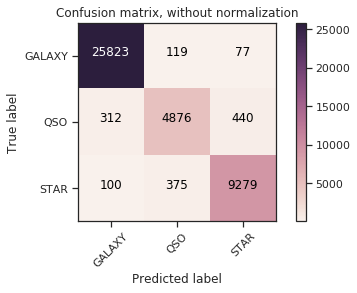

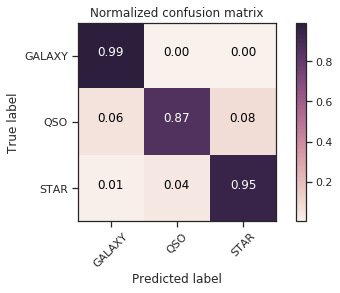

Binary classification results:
Predicted positives: 5370/41401 (12.97%)
logloss = 0.1061
ROC AUC = 0.9853


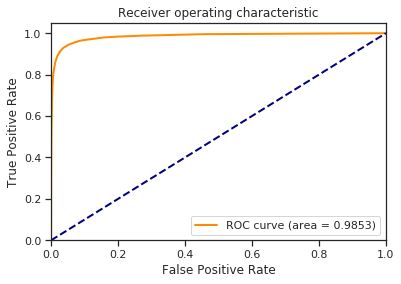

accuracy = 0.9699
f1 = 0.8867
precision = 0.9080
recall = 0.8664


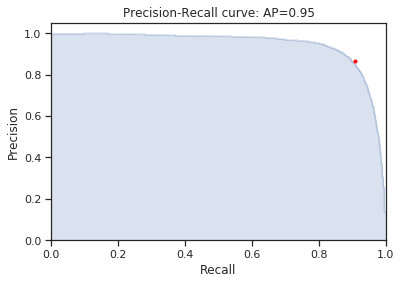

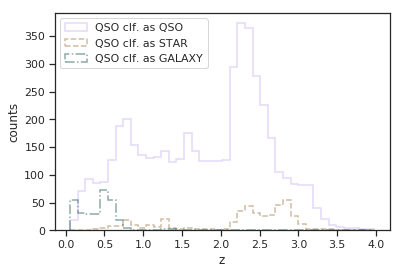

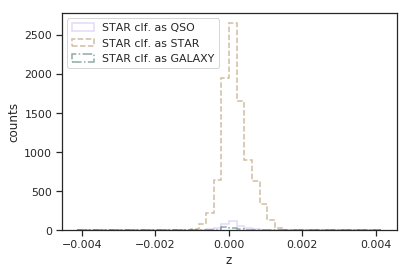

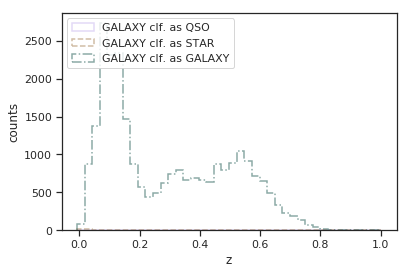

In [11]:
classification_report(predictions, z_max=4)

# No FLAG_BAND
SDSS cleaned, mags+colors+class_star, R cut, all tiles, class_star split

In [62]:
preds_star = pd.read_csv('outputs/experiments/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_clf_f-all_cut-r__2018-08-06_12:18:21.csv')
preds_non_star = pd.read_csv('outputs/experiments/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_clf_f-all_cut-r__2018-08-06_12:20:33.csv')
predictions = pd.concat([preds_star, preds_non_star])

Multiclass classification results:
Accuracy = 0.9655
F1 per class = [0.9882 0.886  0.9494]
Logloss = 0.1441


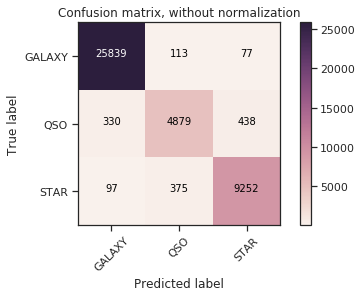

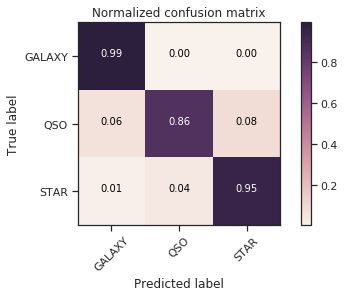

Binary classification results:
Predicted positives: 5367/41400 (12.96%)
logloss = 0.1084
ROC AUC = 0.9855


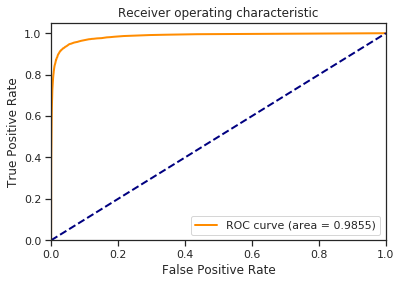

accuracy = 0.9697
f1 = 0.8860
precision = 0.9091
recall = 0.8640


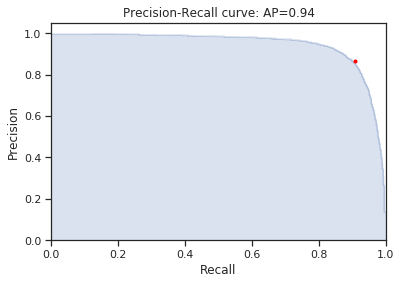

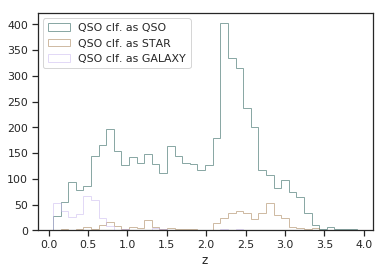

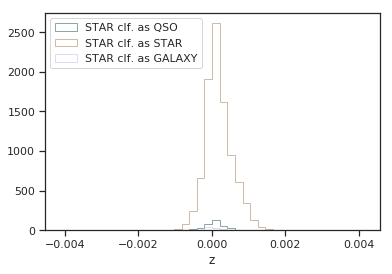

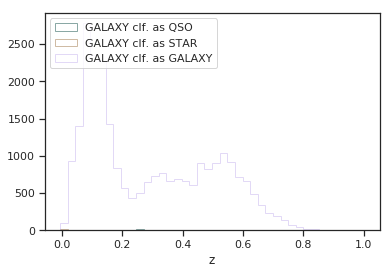

In [127]:
classification_report(predictions, z_max=4)

Multiclass classification results:
Accuracy = 0.9377
F1 per class = [0.156  0.9159 0.955 ]
Logloss = 0.2210


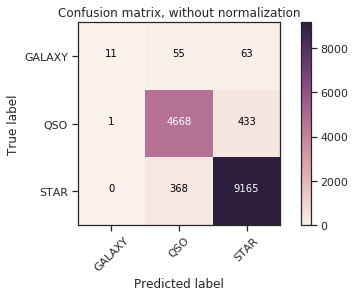

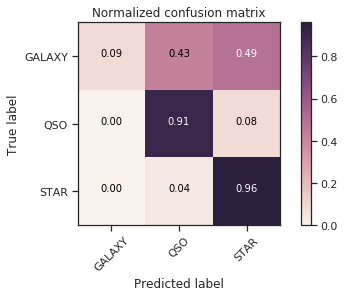

Binary classification results:
Predicted positives: 5091/14764 (34.48%)
logloss = 0.1631
ROC AUC = 0.9839


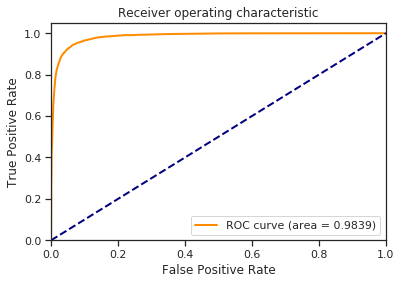

accuracy = 0.9420
f1 = 0.9159
precision = 0.9169
recall = 0.9149


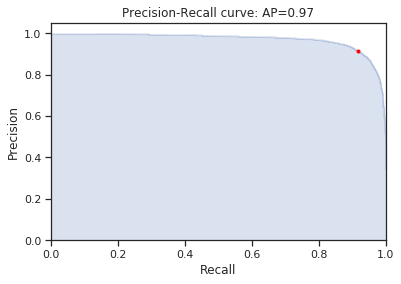

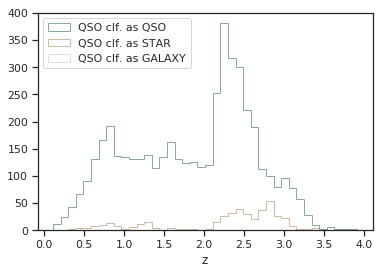

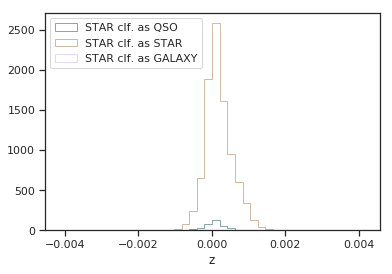

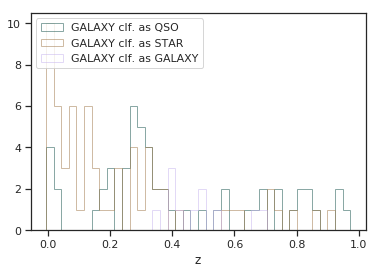

In [128]:
classification_report(preds_star, z_max=4)

Multiclass classification results:
Accuracy = 0.9809
F1 per class = [0.9905 0.514  0.5859]
Logloss = 0.1014


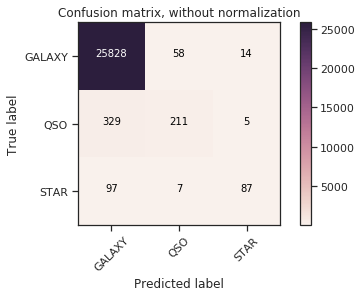

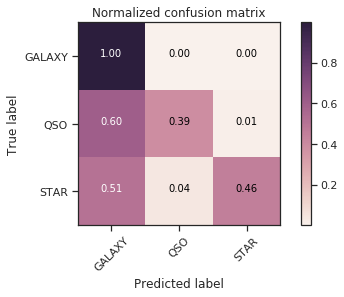

Binary classification results:
Predicted positives: 276/26636 (1.04%)
logloss = 0.0780
ROC AUC = 0.9324


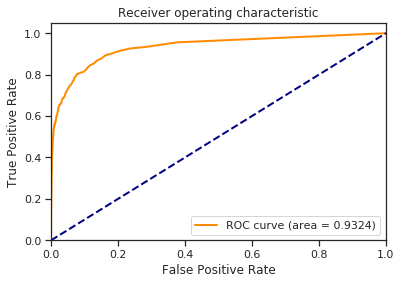

accuracy = 0.9850
f1 = 0.5140
precision = 0.7645
recall = 0.3872


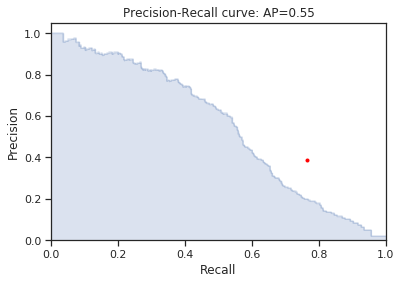

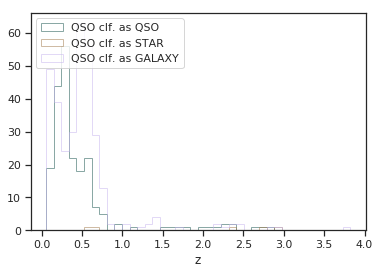

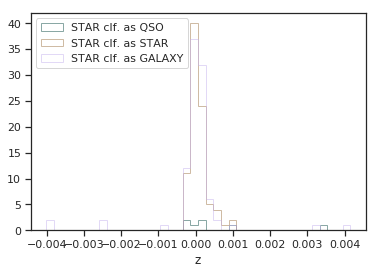

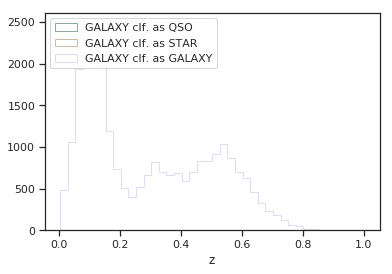

In [129]:
classification_report(preds_non_star, z_max=4)

# KiDS, SDSS cleaned, mags+colors, R cut, all tiles, CLASS_STAR + split

In [52]:
preds_star = pd.read_csv('outputs/experiments/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_f-all_cut-r__2018-04-23_10:39:04.csv')
preds_non_star = pd.read_csv('outputs/experiments/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_f-all_cut-r__2018-04-23_10:39:38.csv')
predictions = pd.concat([preds_star, preds_non_star])
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'

Multiclass classification results:
Accuracy = 0.9655
F1 per class = [0.9882 0.886  0.9494]
Logloss = 0.1441


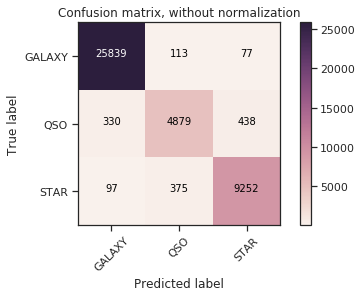

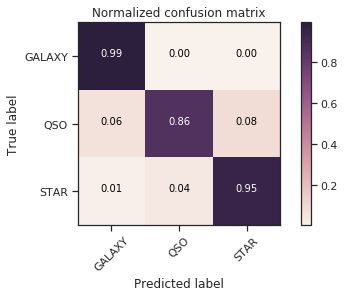

Binary classification results:
Predicted positives: 5367/41400 (12.96%)
logloss = 0.1084
ROC AUC = 0.9855


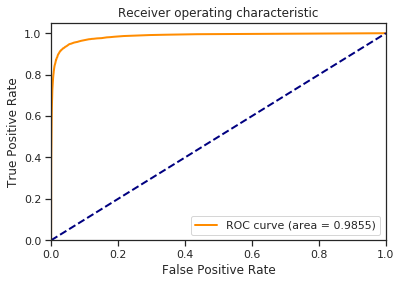

accuracy = 0.9697
f1 = 0.8860
precision = 0.9091
recall = 0.8640


ValueError: cannot convert float NaN to integer

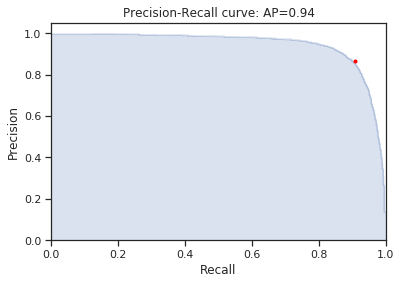

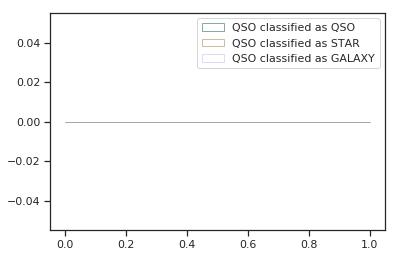

In [61]:
classification_report(predictions)

In [ ]:
classification_report(preds_star)

In [ ]:
classification_report(preds_non_star)

# KiDS, SDSS cleaned, colors, U-G cut, all tiles, CLASS_STAR + split

In [8]:
preds_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_star_sdss-clean_rf_f-colors-cstar_cut-u-g__2018-04-23_10:42:32.csv')
preds_non_star = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_non-star_sdss-clean_rf_f-colors-cstar_cut-u-g__2018-04-23_10:43:09.csv')
predictions = pd.concat([preds_star, preds_non_star])
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'

Multiclass classification results:
Accuracy = 0.9543
F1 per class = [0.9852 0.8765 0.9445]


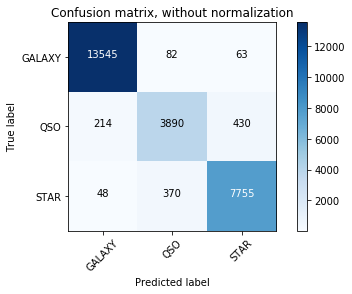

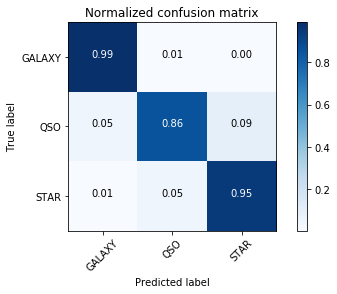

Binary classification results:
Predicted positives: 4342/26397 (16.45%)
logloss = 0.1490
ROC AUC = 0.9789


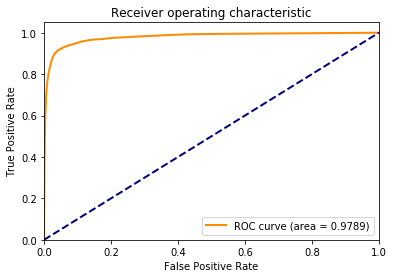

accuracy = 0.9585
f1 = 0.8765
precision = 0.8959
recall = 0.8580


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


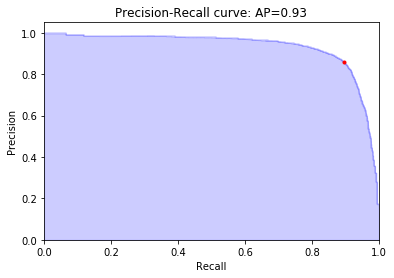

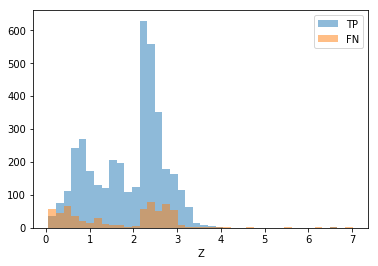

In [9]:
classification_report(predictions, data_path)

Multiclass classification results:
Accuracy = 0.9283
F1 per class = [0.1746 0.9009 0.9481]


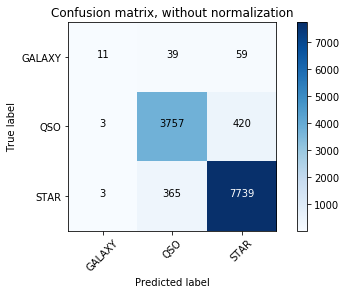

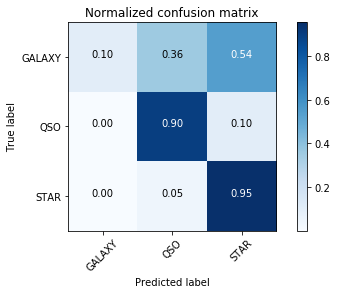

Binary classification results:
Predicted positives: 4161/12396 (33.57%)
logloss = 0.2022
ROC AUC = 0.9750


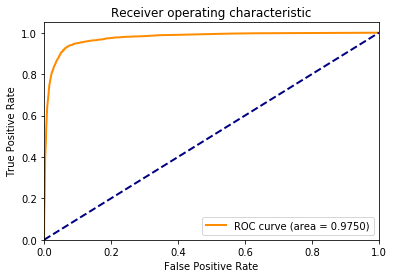

accuracy = 0.9333
f1 = 0.9009
precision = 0.9029
recall = 0.8988


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


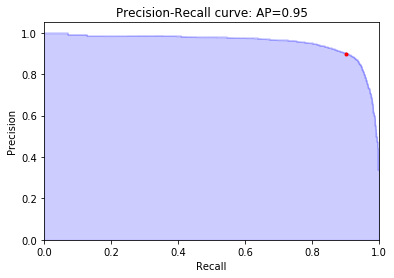

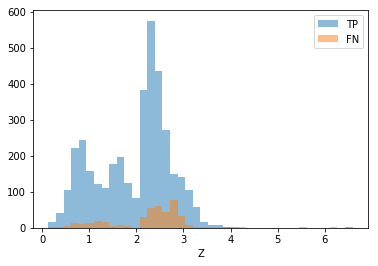

In [10]:
classification_report(preds_star, data_path)

Multiclass classification results:
Accuracy = 0.9773
F1 per class = [0.9889 0.4972 0.3333]


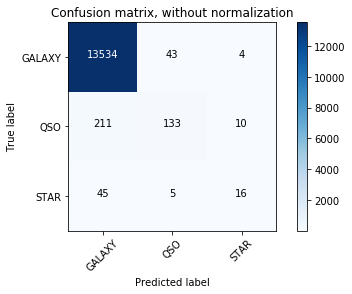

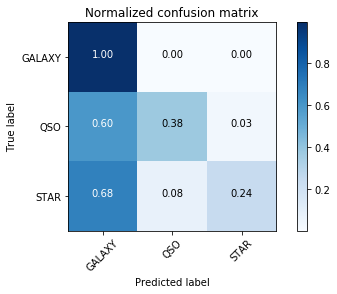

Binary classification results:
Predicted positives: 181/14001 (1.29%)
logloss = 0.1018
ROC AUC = 0.9218


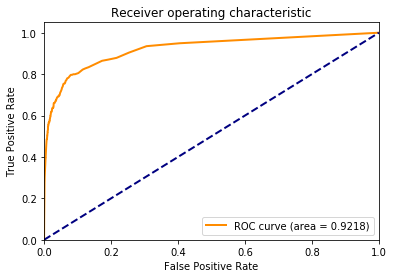

accuracy = 0.9808
f1 = 0.4972
precision = 0.7348
recall = 0.3757


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


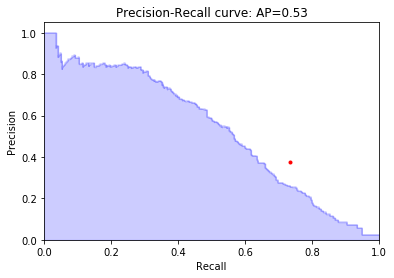

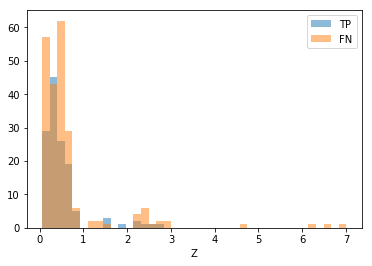

In [11]:
classification_report(preds_non_star, data_path)

# KiDS, SDSS cleaned, mags + colors, R cut, all tiles, CLASS_STAR +

Multiclass classification results:
Accuracy = 0.9580
F1 per class = [0.986  0.8909 0.9499]


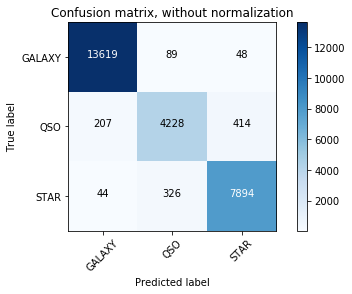

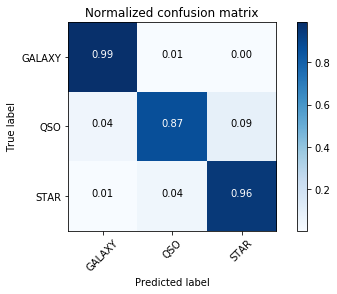

Binary classification results:
Predicted positives: 4643/26869 (17.28%)
logloss = 0.1271
ROC AUC = 0.9847


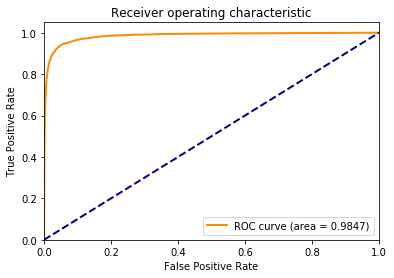

accuracy = 0.9614
f1 = 0.8909
precision = 0.9106
recall = 0.8719


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


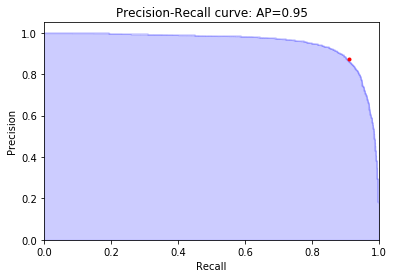

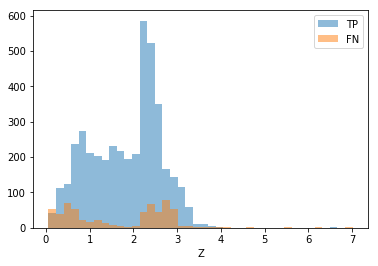

In [12]:
predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-10_15:59:18.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

## CLASS_STAR separation

In [13]:
data = pd.read_csv(data_path)
predictions = predictions.merge(data[['ID', 'CLASS_STAR']], on='ID')

Multiclass classification results:
Accuracy = 0.9348
F1 per class = [0.15   0.912  0.9529]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


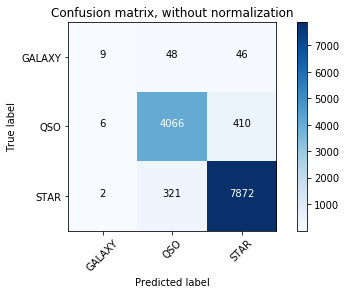

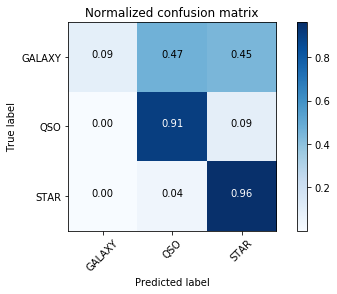

Binary classification results:
Predicted positives: 4435/12780 (34.70%)
logloss = 0.1710
ROC AUC = 0.9824


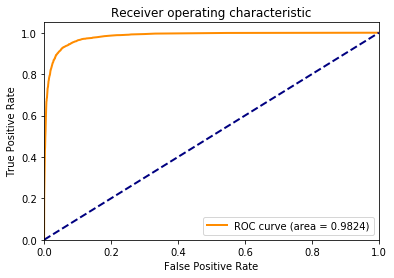

accuracy = 0.9386
f1 = 0.9120
precision = 0.9168
recall = 0.9072


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


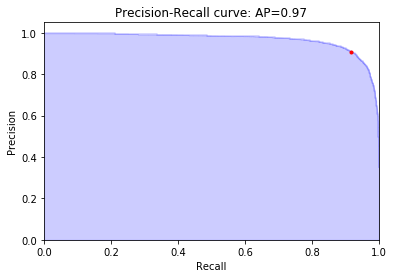

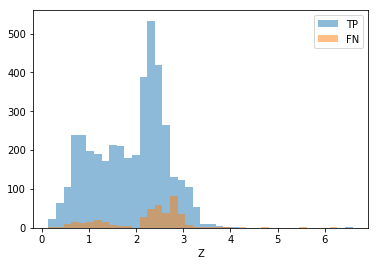

In [14]:
classification_report(predictions.loc[predictions['CLASS_STAR'] >= 0.5], data_path)

Multiclass classification results:
Accuracy = 0.9791
F1 per class = [0.9896 0.5635 0.4536]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


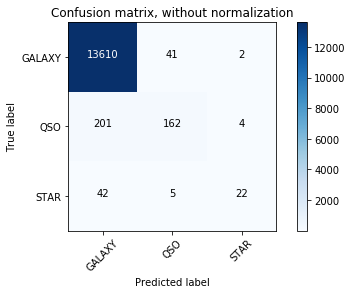

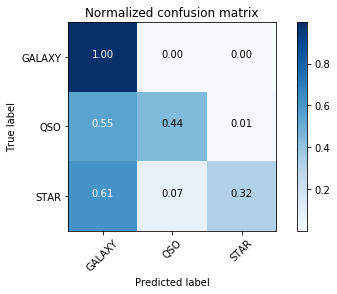

Binary classification results:
Predicted positives: 208/14089 (1.48%)
logloss = 0.0873
ROC AUC = 0.9347


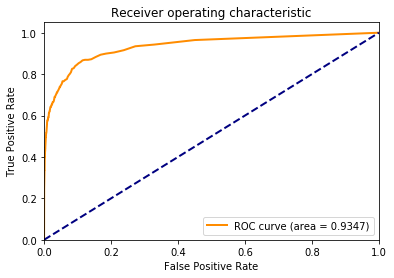

accuracy = 0.9822
f1 = 0.5635
precision = 0.7788
recall = 0.4414


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


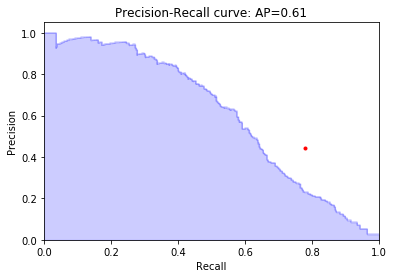

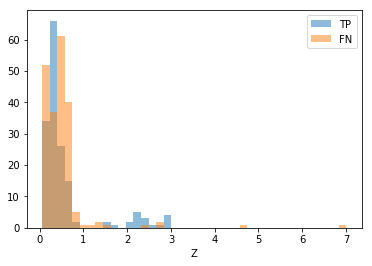

In [15]:
classification_report(predictions.loc[predictions['CLASS_STAR'] <= 0.5], data_path)

# KiDS, SDSS cleaned, colors, U-G cut, all tiles, CLASS_STAR +

Multiclass classification results:
Accuracy = 0.9539
F1 per class = [0.9853 0.8731 0.9446]


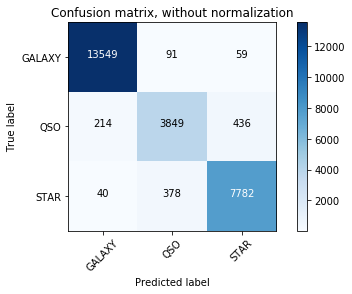

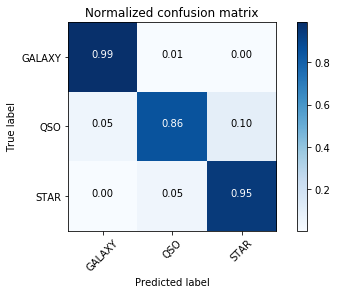

Binary classification results:
Predicted positives: 4318/26398 (16.36%)
logloss = 0.1532
ROC AUC = 0.9789


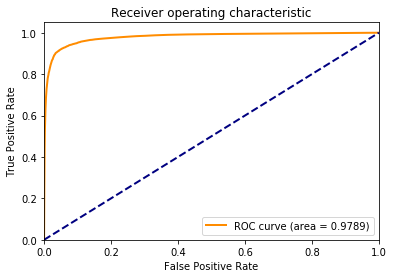

f1 = 0.8731
precision = 0.8914
accuracy = 0.9576
recall = 0.8555


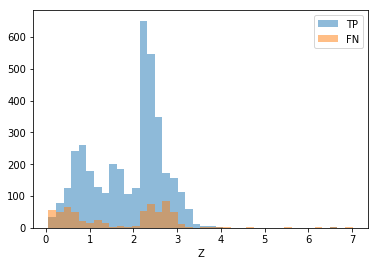

In [4]:
predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-colors-cstar_cut-u-g__2018-04-12_11:04:56.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS, SDSS cleaned, mags + colors, R cut, all tiles

Multiclass classification results:
Accuracy = 0.9412
F1 per class = [0.9679 0.8807 0.9318]


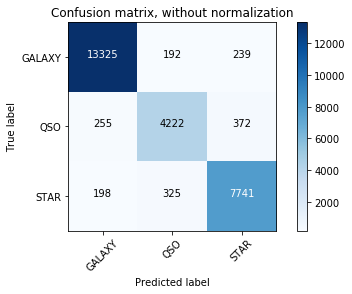

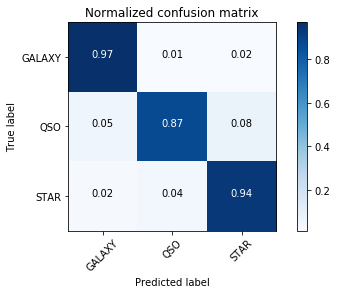

Binary classification results:
Predicted positives: 4739/26869 (17.64%)
logloss = 0.1421
ROC AUC = 0.9811


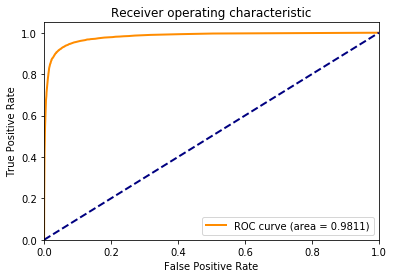

precision = 0.8909
accuracy = 0.9574
recall = 0.8707
f1 = 0.8807


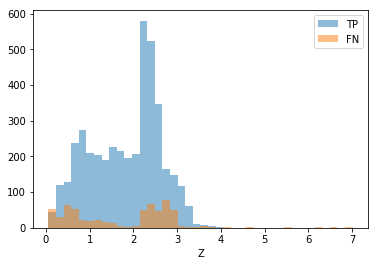

In [45]:
predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-06_11:39:58.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

## CLASS_STAR separation

In [46]:
data = pd.read_csv(data_path)
predictions = predictions.merge(data[['ID', 'CLASS_STAR']], on='ID')

/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9219
F1 per class = [0.1522 0.91   0.9457]


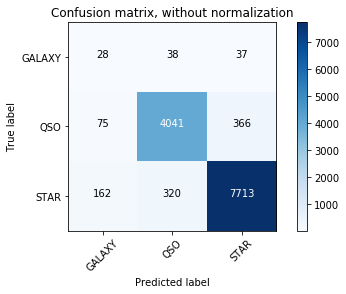

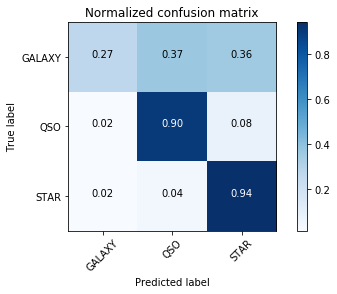

Binary classification results:
Predicted positives: 4399/12780 (34.42%)
logloss = 0.1803
ROC AUC = 0.9805


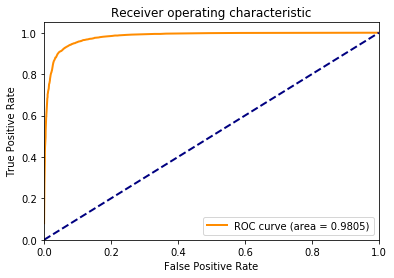

precision = 0.9186
accuracy = 0.9375
recall = 0.9016
f1 = 0.9100


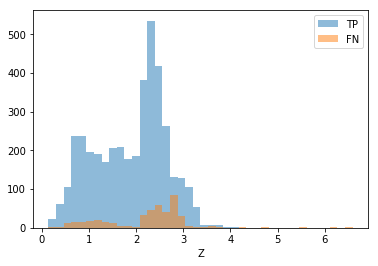

In [47]:
classification_report(predictions.loc[predictions['CLASS_STAR'] >= 0.5], data_path)

Multiclass classification results:
Accuracy = 0.9566
F1 per class = [0.9781 0.5935 0.3688]


/home/snakoneczny/tools/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


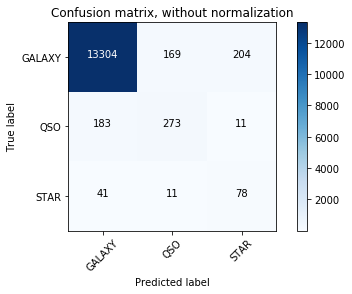

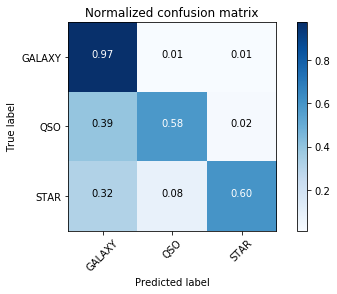

Binary classification results:
Predicted positives: 453/14274 (3.17%)
logloss = 0.1118
ROC AUC = 0.9302


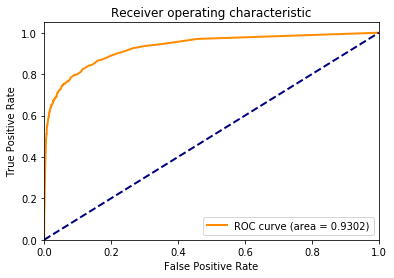

precision = 0.6026
accuracy = 0.9738
recall = 0.5846
f1 = 0.5935


In [35]:
classification_report(predictions.loc[predictions['CLASS_STAR'] <= 0.5], data_path)

# KiDS, SDSS cleaned, colors, U-G cut, all tiles

Multiclass classification results:
Accuracy = 0.9316
F1 per class = [0.9625 0.8539 0.9218]


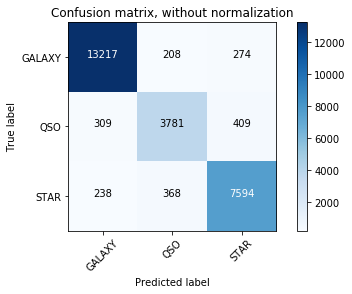

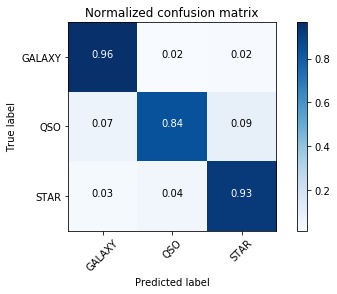

Binary classification results:
Predicted positives: 4357/26398 (16.51%)
logloss = 0.1936
ROC AUC = 0.9696


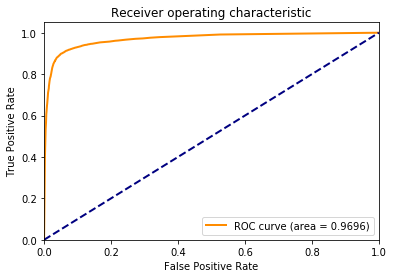

precision = 0.8678
accuracy = 0.9510
recall = 0.8404
f1 = 0.8539


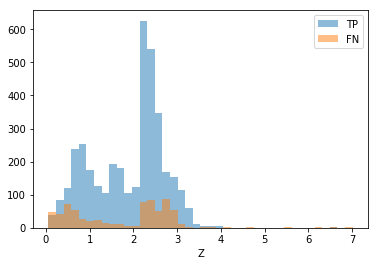

In [4]:
predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_sdss-clean_rf_f-colors_cut-u-g__2018-04-10_10:14:48.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS, SDSS cleaned, R cut

Multiclass classification results:
Accuracy = 0.9425
F1 per class = [0.9694 0.8817 0.9338]


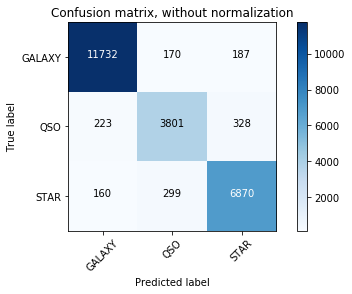

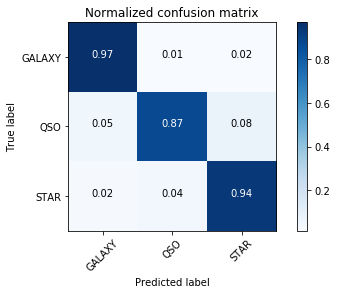

Binary classification results:
Predicted positives: 4270/23770 (17.96%)
logloss = 0.1580
ROC AUC = 0.9800


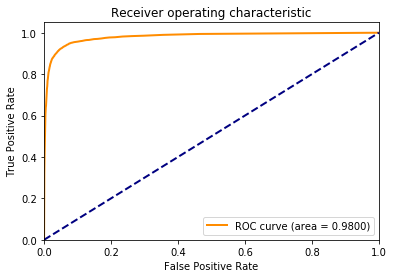

recall = 0.8734
precision = 0.8902
accuracy = 0.9571
f1 = 0.8817


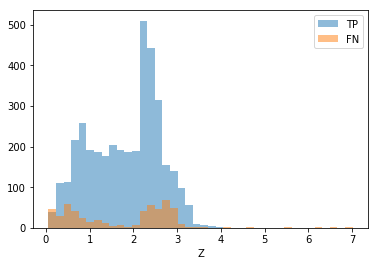

In [21]:
predictions = pd.read_csv('experiments/KiDS_DR3_x_SDSS_DR14_cleaned_rcut__2018-03-05_14:13:44.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS, SDSS cleaned, color cut, color features

Multiclass classification results:
Accuracy = 0.9299
F1 per class = [0.9632 0.8487 0.9196]


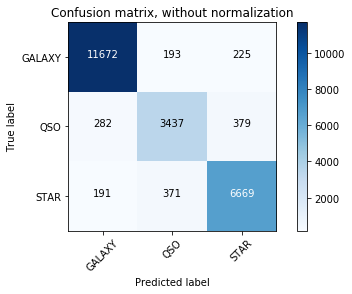

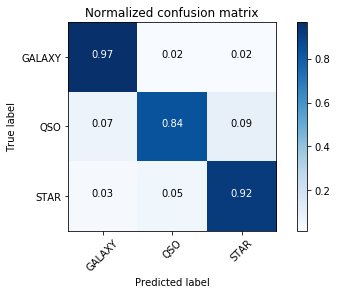

Binary classification results:
Predicted positives: 4001/23419 (17.08%)
logloss = 0.2123
ROC AUC = 0.9682


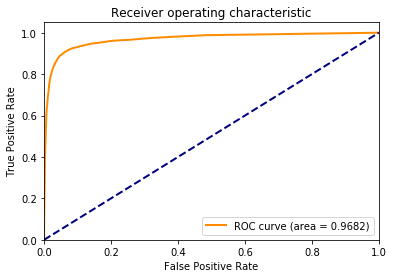

precision = 0.8590
accuracy = 0.9477
f1 = 0.8487
recall = 0.8387


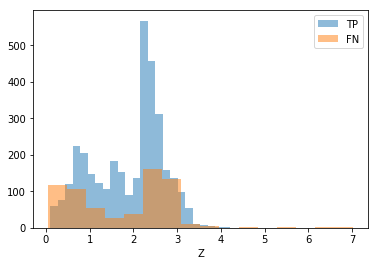

In [6]:
predictions = pd.read_csv('predictions/KiDS_DR3_x_SDSS_DR14_cleaned_colors_cut__2018-03-05_13:59:06.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS, SDSS cleaned

Multiclass classification results:
Accuracy = 0.9416
F1 per class = [0.9691 0.8831 0.9321]


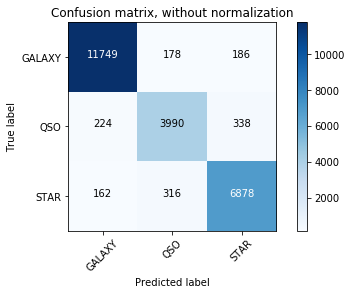

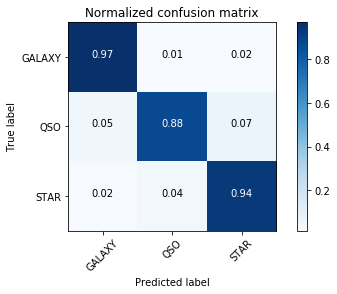

Binary classification results:
Predicted positives: 4484/24021 (18.67%)
logloss = 0.1595
ROC AUC = 0.9802


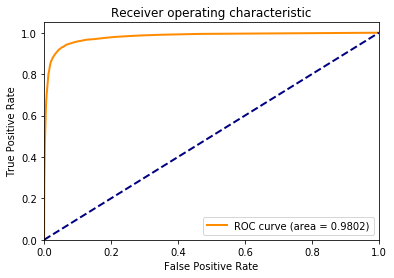

precision = 0.8898
accuracy = 0.9560
f1 = 0.8831
recall = 0.8765


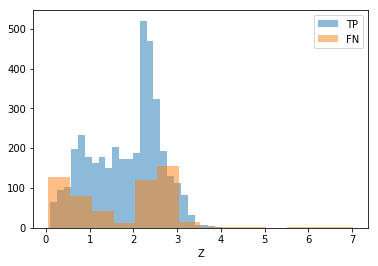

In [8]:
predictions = pd.read_csv('predictions/KiDS_DR3_x_SDSS_DR14_cleaned__2018-03-05_13:04:18.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS

Multiclass classification results:
Accuracy = 0.9128
F1 per class = [0.9578 0.8279 0.8988]


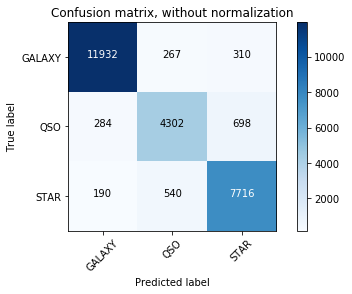

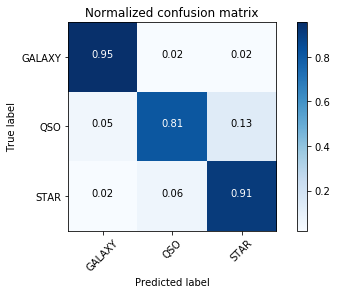

Binary classification results:
Predicted positives: 5109/26239 (19.47%)
logloss = 0.2481
ROC AUC = 0.9636


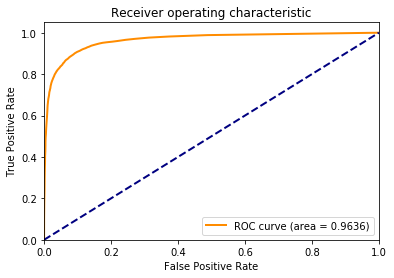

precision = 0.8420
accuracy = 0.9318
f1 = 0.8279
recall = 0.8142


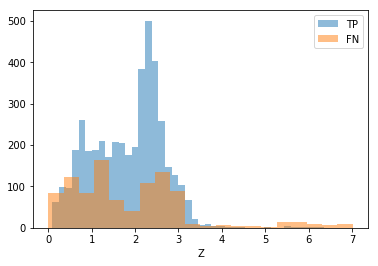

In [9]:
predictions = pd.read_csv('predictions/KiDS_DR3_x_SDSS_DR14__2018-02-27_11:33:16.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS STAR, SDSS cleaned, mags + colors, R cut, all tiles

Multiclass classification results:
Accuracy = 0.9350
F1 per class = [0.0455 0.9125 0.9518]


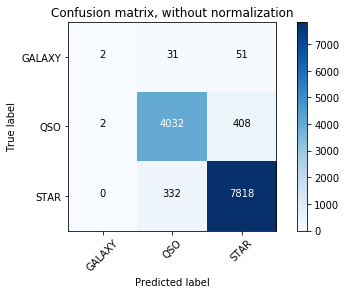

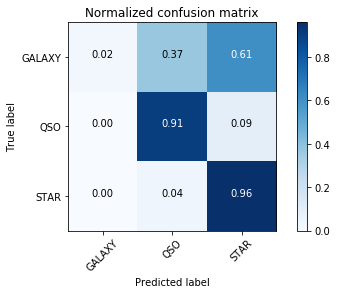

Binary classification results:
Predicted positives: 4395/12676 (34.67%)
logloss = 0.1654
ROC AUC = 0.9821


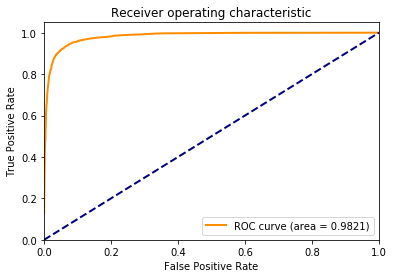

precision = 0.9174
accuracy = 0.9390
recall = 0.9077
f1 = 0.9125


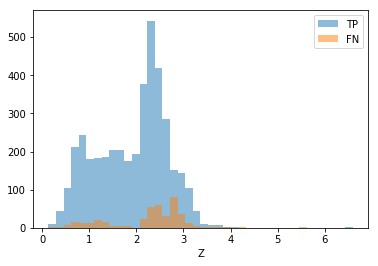

In [7]:
predictions = pd.read_csv('experiments/KiDS_DR3_STAR_x_SDSS_DR14_sdss-clean_rf_f-all_cut-r__2018-04-10_10:21:20.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS STAR, SDSS cleaned, colors, U-G cut, all tiles

Multiclass classification results:
Accuracy = 0.9282
F1 per class = [0.0235 0.8993 0.9476]


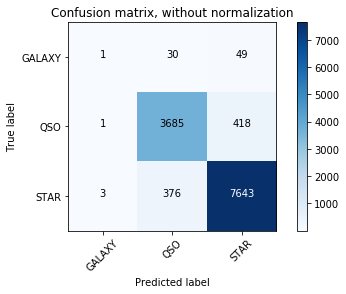

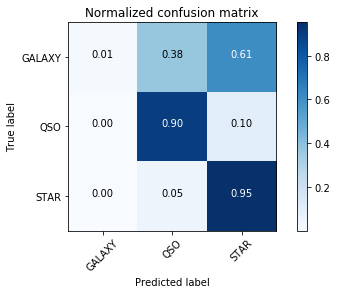

Binary classification results:
Predicted positives: 4091/12206 (33.52%)
logloss = 0.2288
ROC AUC = 0.9735


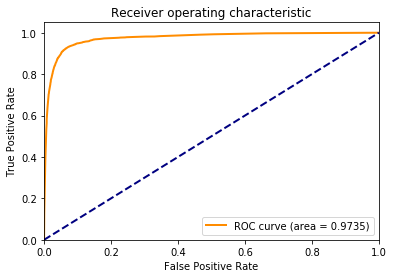

precision = 0.9008
accuracy = 0.9324
recall = 0.8979
f1 = 0.8993


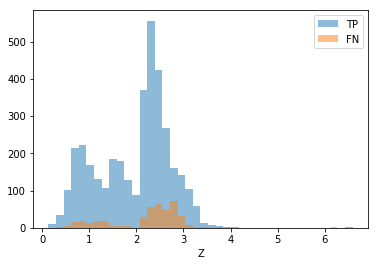

In [8]:
predictions = pd.read_csv('experiments/KiDS_DR3_STAR_x_SDSS_DR14_sdss-clean_rf_f-colors_cut-u-g__2018-04-10_10:22:29.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS STAR, SDSS cleaned, R band cut

Multiclass classification results:
Accuracy = 0.9368
F1 per class = [0.     0.9145 0.9529]


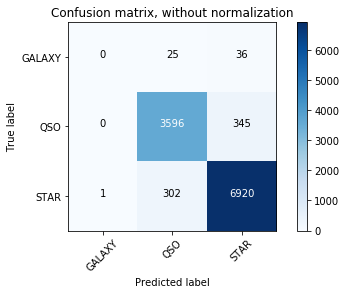

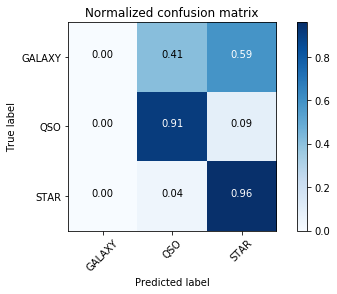

Binary classification results:
Predicted positives: 3923/11225 (34.95%)
logloss = 0.1696
ROC AUC = 0.9816


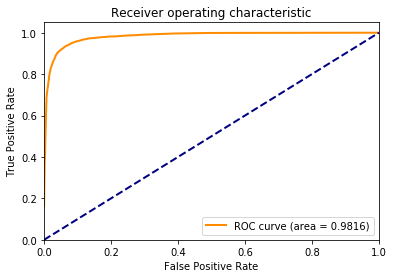

accuracy = 0.9401
recall = 0.9125
f1 = 0.9145
precision = 0.9166


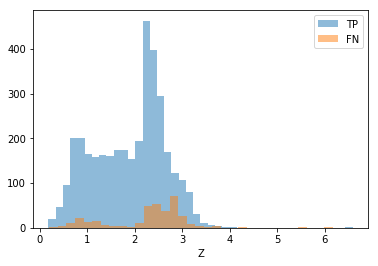

In [10]:
predictions = pd.read_csv('predictions/KiDS_DR3_STAR_x_SDSS_DR14_cleaned_rcut__2018-03-08_11:37:06.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.star.cols.csv'
classification_report(predictions, data_path)

# KiDS STAR, SDSS cleaned, color cut, color features

Multiclass classification results:
Accuracy = 0.9251
F1 per class = [0.     0.8944 0.9448]


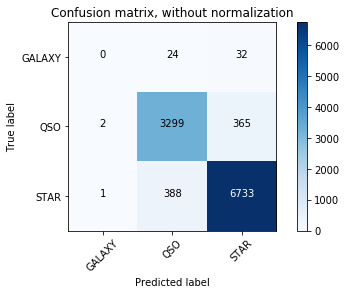

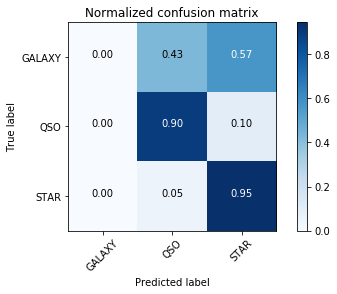

Binary classification results:
Predicted positives: 3711/10844 (34.22%)
logloss = 0.2570
ROC AUC = 0.9720


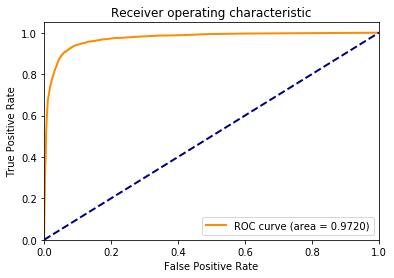

accuracy = 0.9282
recall = 0.8999
f1 = 0.8944
precision = 0.8890


FileNotFoundError: File b'/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.stars.cols.csv' does not exist

In [8]:
predictions = pd.read_csv('predictions/KiDS_DR3_STAR_x_SDSS_DR14_cleaned_colors_cut__2018-03-08_11:37:42.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.star.cols.csv'
classification_report(predictions, data_path)

# KiDS STAR

Multiclass classification results:
Accuracy = 0.8870
F1 per class = [0.0151 0.8578 0.9169]


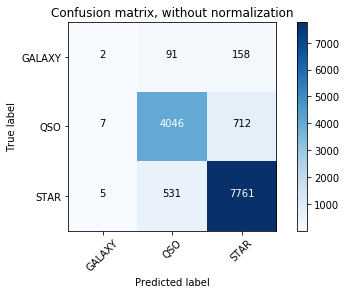

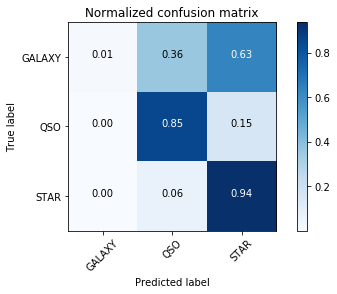

Binary classification results:
Predicted positives: 4668/13313 (35.06%)
logloss = 0.3012
ROC AUC = 0.9565


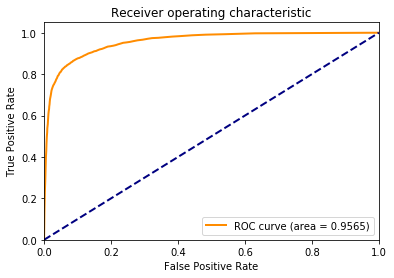

precision = 0.8668
accuracy = 0.8993
f1 = 0.8578
recall = 0.8491


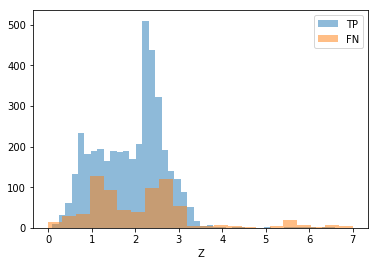

In [15]:
predictions = pd.read_csv('predictions/KiDS_DR3_STAR_x_SDSS_DR14__2018-02-22_12:42:04.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.stars.cols.csv'
classification_report(predictions, data_path)

# KiDS x GAIA, SDSS cleaned, R band cut

Multiclass classification results:
Accuracy = 0.9486
F1 per class = [0.9516 0.9196 0.9609]


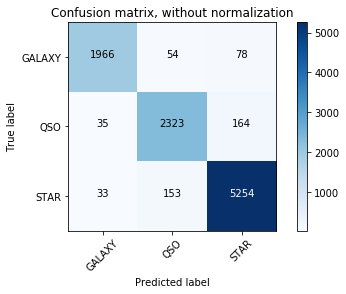

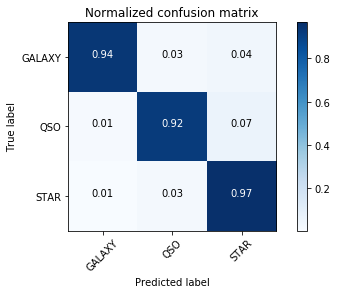

Binary classification results:
Predicted positives: 2530/10060 (25.15%)
logloss = 0.1373
ROC AUC = 0.9876


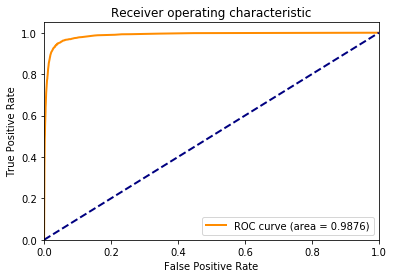

accuracy = 0.9596
recall = 0.9211
f1 = 0.9196
precision = 0.9182


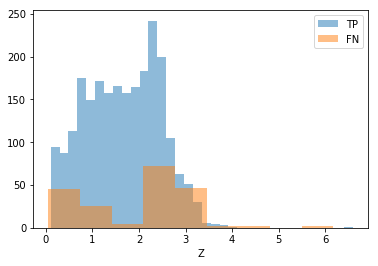

In [5]:
predictions = pd.read_csv('predictions/KiDS_DR3_x_GAIA_x_SDSS_DR14_cleaned_rcut__2018-03-08_11:34:01.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS x GAIA, SDSS cleaned, color cut, color features

Multiclass classification results:
Accuracy = 0.9378
F1 per class = [0.9393 0.8901 0.9565]


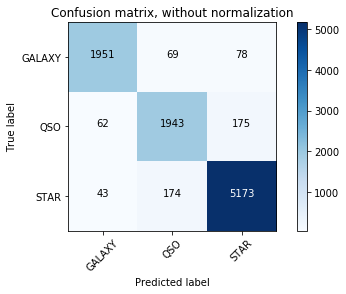

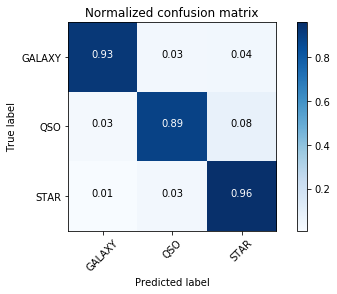

Binary classification results:
Predicted positives: 2186/9668 (22.61%)
logloss = 0.1875
ROC AUC = 0.9817


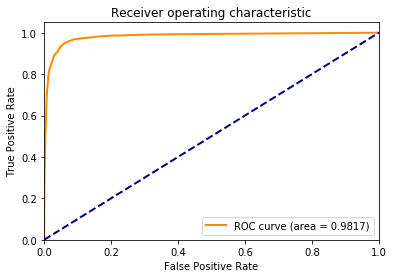

precision = 0.8888
accuracy = 0.9504
f1 = 0.8901
recall = 0.8913


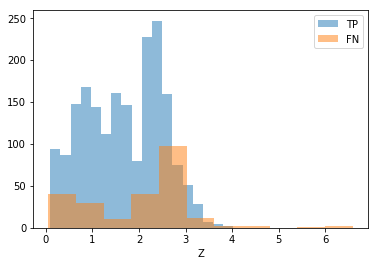

In [12]:
predictions = pd.read_csv('predictions/KiDS_DR3_x_GAIA_x_SDSS_DR14_cleaned_colors_cut__2018-03-06_15:57:41.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS x GAIA

Multiclass classification results:
Accuracy = 0.9337
F1 per class = [0.9351 0.902  0.9481]


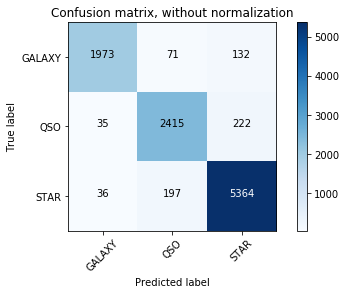

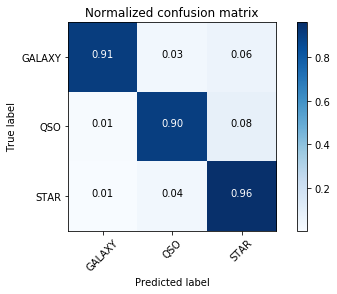

Binary classification results:
Predicted positives: 2683/10445 (25.69%)
logloss = 0.2086
ROC AUC = 0.9795


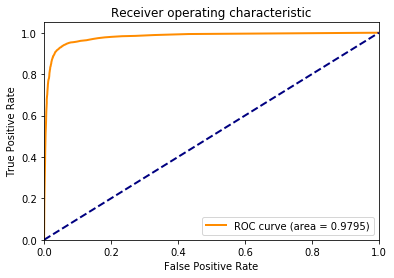

precision = 0.9001
accuracy = 0.9497
f1 = 0.9020
recall = 0.9038


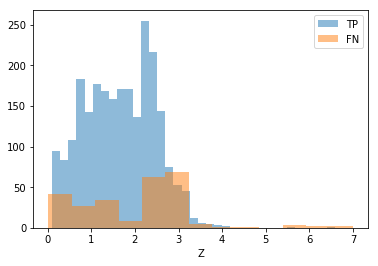

In [13]:
predictions = pd.read_csv('predictions/KiDS_DR3_x_GAIA_x_SDSS_DR14__2018-02-22_12:41:31.csv')
data_path = '/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv'
classification_report(predictions, data_path)

# KiDS STAR x GAIA: two models

In [4]:
preds_gaia = pd.read_csv('predictions/KiDS_DR3_x_GAIA_x_SDSS_DR14__2018-02-22_12:41:31.csv')
preds_star = pd.read_csv('predictions/KiDS_DR3_STAR_x_SDSS_DR14__2018-02-22_12:42:04.csv')

In [5]:
id_intersection = np.intersect1d(preds_gaia['ID'], preds_star['ID'])
id_intersection.shape

(8123,)

In [6]:
print(np.unique(preds_gaia['CLASS'], return_counts=True))
print(np.unique(preds_star['CLASS'], return_counts=True))
print(np.unique(preds_gaia.loc[preds_gaia['ID'].isin(id_intersection), 'CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([2176, 2672, 5597]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 251, 4765, 8297]))
(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([ 108, 2478, 5537]))


/home/snakoneczny/tools/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9324
F1 per class = [0.014  0.9106 0.9539]


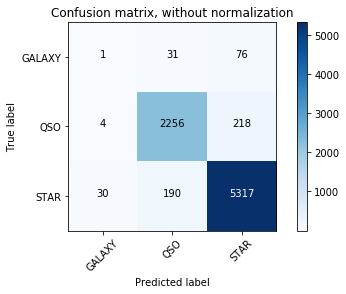

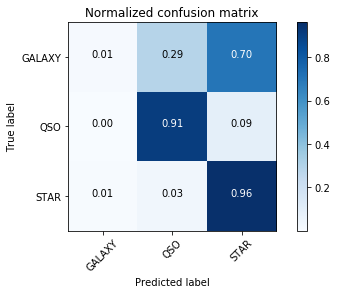

Binary classification results:
logloss = 0.2337
ROC AUC = 0.9784


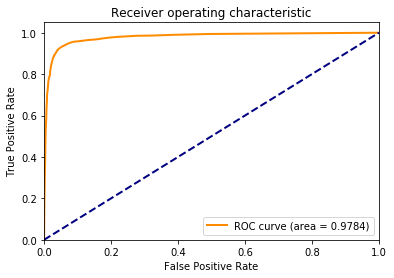

accuracy = 0.9455
f1 = 0.9106
precision = 0.9108
recall = 0.9104


In [21]:
classification_report(preds_gaia.loc[preds_gaia['ID'].isin(id_intersection)])

/home/snakoneczny/tools/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Multiclass classification results:
Accuracy = 0.9387
F1 per class = [0.018  0.9155 0.9581]


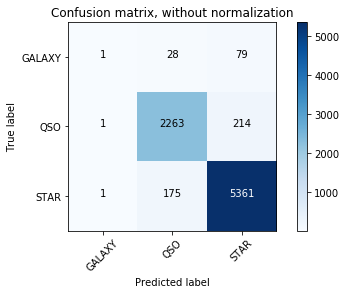

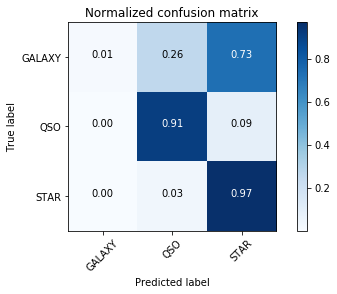

Binary classification results:
logloss = 0.2196
ROC AUC = 0.9793


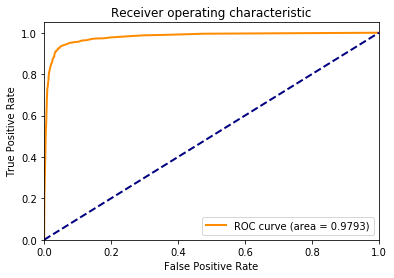

accuracy = 0.9485
f1 = 0.9155
precision = 0.9177
recall = 0.9132


In [8]:
classification_report(preds_star.loc[preds_star['ID'].isin(id_intersection)])

# Error analysis

In [4]:
predictions = pd.read_csv('predictions/KiDS_DR3_STAR_x_SDSS_DR14__2018-02-22_12:42:04.csv')

In [7]:
kids_star = process_kids('/home/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.stars.cols.csv')

Data shape: (30940, 35)
Droping NANs: 30940 left
Removing flags: 13861 left
Removing errors bigger than observations: 13857 left
Removing limiting magnitudes: 13313 left
Clean data shape: (13313, 45)


In [8]:
# Quasars and stars analysis
class_names = np.unique(predictions['CLASS'])
predictions['class_pred'] = predictions[class_names].idxmax(axis=1)

tp = predictions.loc[(predictions['CLASS'] == 'QSO') & (predictions['class_pred'] == 'QSO')]
tn = predictions.loc[(predictions['CLASS'] == 'STAR') & (predictions['class_pred'] == 'STAR')]
fp = predictions.loc[(predictions['CLASS'] == 'STAR') & (predictions['class_pred'] == 'QSO')]
fn = predictions.loc[(predictions['CLASS'] == 'QSO') & (predictions['class_pred'] == 'STAR')]

In [9]:
print(predictions.shape)
print(kids_star.shape)
print(tp.shape)
print(tn.shape)
print(fp.shape)
print(fn.shape)

(13313, 7)
(13313, 45)
(4046, 7)
(7761, 7)
(531, 7)
(712, 7)


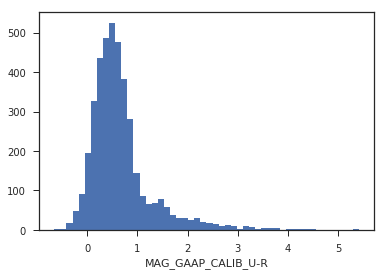

In [12]:
# Check z at the whole set and errors
sns.set(style='ticks')
sns.distplot(kids_star.loc[kids_star['ID'].isin(tp['ID']), MAG_GAAP_CALIB_UR], kde=False, rug=False, hist_kws={'alpha': 1})

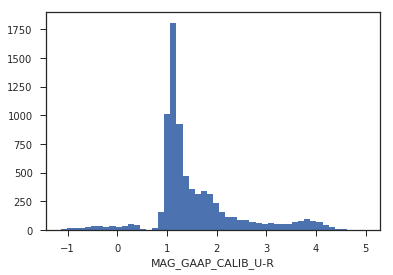

In [13]:
# Check z at the whole set and errors
sns.set(style='ticks')
sns.distplot(kids_star.loc[kids_star['ID'].isin(tn['ID']), MAG_GAAP_CALIB_UR], kde=False, rug=False, hist_kws={'alpha': 1})

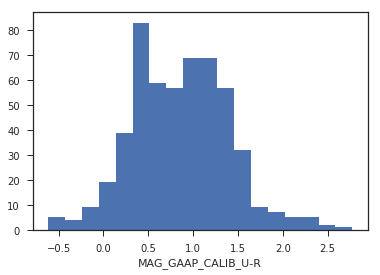

In [14]:
# Check z at the whole set and errors
sns.set(style='ticks')
sns.distplot(kids_star.loc[kids_star['ID'].isin(fp['ID']), MAG_GAAP_CALIB_UR], kde=False, rug=False, hist_kws={'alpha': 1})

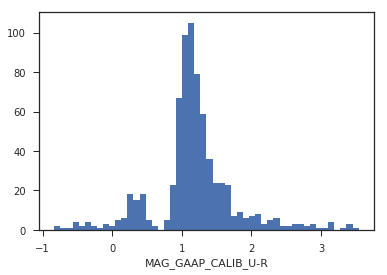

In [15]:
# Check z at the whole set and errors
sns.set(style='ticks')
sns.distplot(kids_star.loc[kids_star['ID'].isin(fn['ID']), MAG_GAAP_CALIB_UR], kde=False, rug=False, hist_kws={'alpha': 1})